In [1]:
#load packages
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [2]:
#get data
sentences = pd.read_csv('yelp_labelled.txt', sep = '\t', header=None)
sentences.columns = ['sentence', 'sentiment']

In [3]:
#define keywords for model
keywords = ['loved', 'great', 'amazing', 'good', 'like', 'tasty', 'delicious', 'love', 'fantastic', 'best',
           'wonderful', 'nice', 'friendly', 'excellent', 'beautiful', 'incredible', 'liked', 'delish', 'flavorful',
           'unbelievable', 'fun', 'fast', 'generous', 'fresh', 'charming', 'caring', 'satisfying', 'highlight',
           'enjoyed', 'authentic', 'happy', 'awesome', 'pleasure', 'yummy', 'impressed', 'huge', 'fabulous', 
            'options', 'clean', 'cute', 'pleased', 'quick', 'reasonable', '5', 'rare', 'favorite', 'comfortable',
           'promptly', 'tender', 'regular', 'homemade', 'beauty', 'reasonably', 'jewel', 'exquisite']

for key in keywords:
    sentences[str(key)] = sentences.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)

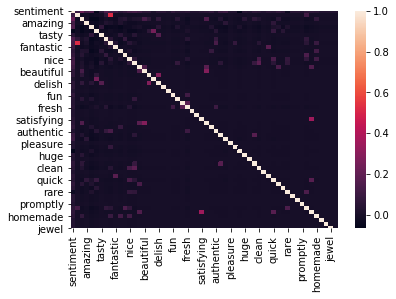

In [4]:
#show correlation between keywords
sns.heatmap(sentences.corr())
plt.show()

In [5]:
#define data and target
data = sentences[keywords]
target = sentences['sentiment']

In [6]:
#fit model
model = BernoulliNB()
model.fit(data, target)
prediction = model.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != prediction).sum()
))

Number of mislabeled points out of a total 1000 points : 224


In [7]:
#load amazon data
sentences2 = pd.read_csv('amazon_cells_labelled.txt', sep = '\t', header=None)
sentences2.columns = ['sentence', 'sentiment']

In [8]:
#define data and target and fit model
for key in keywords:
    sentences2[str(key)] = sentences2.sentence.str.contains(' ' + str(key) + ' '+'|'+ ' ' + str(key) + '.' 
                                                          +'|'+' ' + str(key) + '!'+'|'+ ' '+ str(key) + ',', case=False)
data2 = sentences2[keywords]
target2 = sentences2['sentiment']
model2 = BernoulliNB()
model2.fit(data2, target2)
prediction2 = model2.predict(data2)
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != prediction2).sum()
))

Number of mislabeled points out of a total 1000 points : 317


For this challenge, I started by selecting words like loved and liked as well as adjectives like good, great, amazing etc. Then, there were other adjectives that are likely to be used to describe good service such as friendly, nice, and caring. Finally, there were other types of words like yummy, tasty, and delicious that described how the food tasted.

This classifier worked ok on the IMDB dataset, although not as well as it worked on the Yelp dataset. This makes sense because words like liked, loved, great, and amazing are likely to also apply to movie reviews, but words like delicious and tasty are not. It is likely that there are other words that apply to movie reviews but not to restaurant reviews like interesting or compelling.